In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
menu = pd.read_excel('menu.xlsx')

In [3]:
menu.head(5) 

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


##### The S.I. Units for Calories is 'kcal', for Sodium is 'milligrams' and for the rest of the nutrients it is 'grams'

In [4]:
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [5]:
menu.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [6]:
menu.shape

(260, 24)

There aren't any blank values in the dataset, hence the data is clean. Let's move to Visualizations:

# Exploratory Data Analysis:

## To see the categorical distribution of the food items that served in McDonalds:

In [7]:
menu['Category'].value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

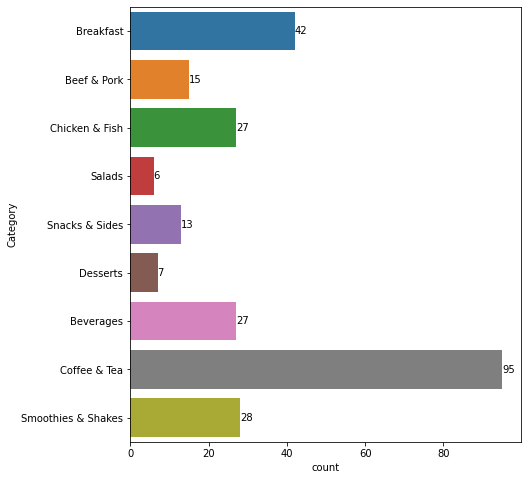

In [8]:
plt.figure(figsize=(7,8))
a = sns.countplot(y='Category', data=menu)

for bars in a.containers:  # This is to get no.s on the bars:
    a.bar_label(bars)

#### From above graphs it is clear that coffee & tea are the most selling items in McDonalds.

In [9]:
max_values = menu[['Calories','Total Fat','Carbohydrates','Dietary Fiber','Sugars','Protein','Vitamin A (% Daily Value)',
                  'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']].max()
print(max_values)

Calories                     1880.0
Total Fat                     118.0
Carbohydrates                 141.0
Dietary Fiber                   7.0
Sugars                        128.0
Protein                        87.0
Vitamin A (% Daily Value)     170.0
Vitamin C (% Daily Value)     240.0
Calcium (% Daily Value)        70.0
Iron (% Daily Value)           40.0
dtype: float64


#### According to the dataset summary, the maximum value for Calories and some other variable seems to be high. Let's try to figure out the Category and Item that contains high calories, but first we will check to see if infact there is any correlation btw Calories and other independent variables by plotting a correlation matrix next.

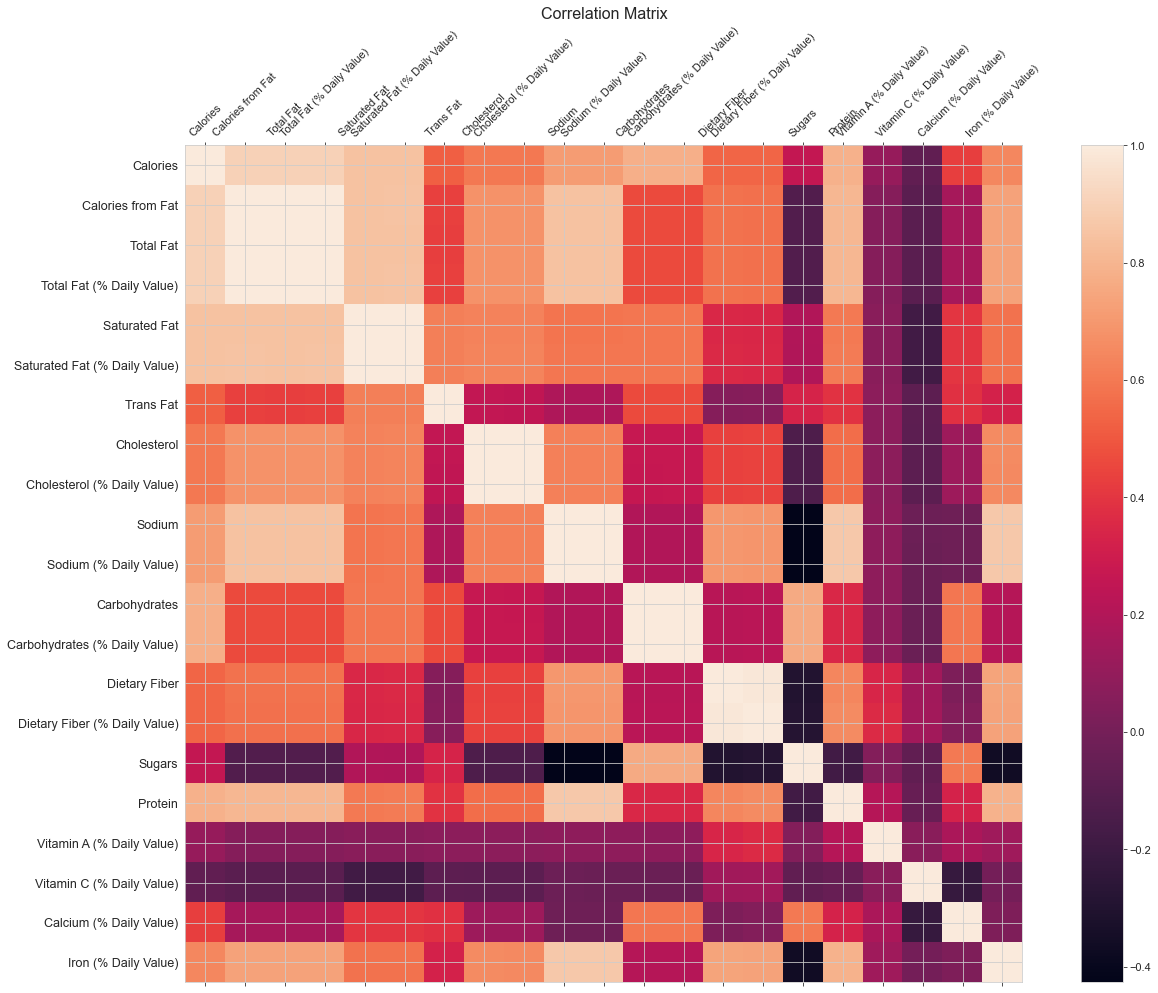

In [87]:
# PLotting correlation matrix for the dataset:

f = plt.figure(figsize=(21,15))
plt.matshow(menu.corr(), fignum=f.number)
plt.xticks(range(menu.select_dtypes(['number']).shape[1]), menu.select_dtypes(['number']).columns, fontsize=11, rotation=45)
plt.yticks(range(menu.select_dtypes(['number']).shape[1]), menu.select_dtypes(['number']).columns, fontsize=12.5)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=11)
plt.title('Correlation Matrix', fontsize=16);

#### The correlation coefficients are proportionate to the box's size and color intensity.
#### As it can be seen, the variable (Calories), has strong, obvious correlations with all of the other independent variables, whether they are Positive or Negative.

### plot for Calories vs Category to spot outliers and max calories category:

In [11]:
calorie = menu.groupby(['Category'], as_index=False)['Calories'].sum().sort_values(by='Calories', ascending=False)
calorie

,Category,Calories
4,Coffee & Tea,26970
2,Breakfast,22120
3,Chicken & Fish,14930
7,Smoothies & Shakes,14880
0,Beef & Pork,7410
8,Snacks & Sides,3195
1,Beverages,3070
6,Salads,1620
5,Desserts,1555


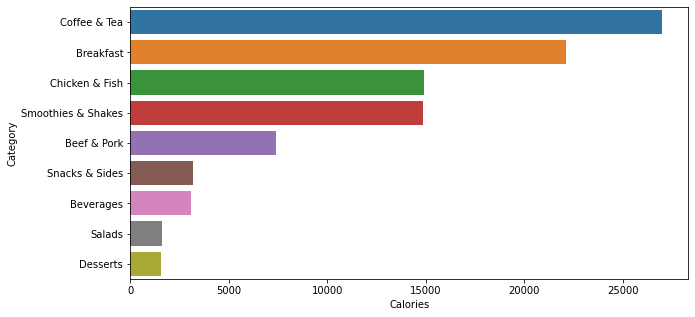

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x='Calories', y='Category', data=calorie);

#### from above barplot it is clear that we have quite a number of outliers:

### Now let's figure out which exact item contain high Calories in the Category: 

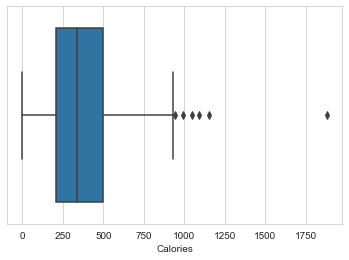

In [13]:
# plotting boxplot to look for high Calories outliers:

plot = sns.set_style('whitegrid')
ax = sns.boxplot(x = menu['Calories']);

In [14]:
# using .idxmax() to get the index of the item:

menu['Calories'].idxmax()

82

In [15]:
# using .at[] to get the exact item:

menu.at[82,  'Category']

'Chicken & Fish'

In [16]:
menu.at[82,  'Item']

'Chicken McNuggets (40 piece)'

In [17]:
menu.at[82,  'Calories']

1880

#### Among the dataset 'Chicken McNuggets (40 piece)' is the highest calorie food falling in the Category of 'Chicken & Fish' with Calories of 1880 kcal

### Now find other items using same fact for other Categories:

### Sodium vs Category:

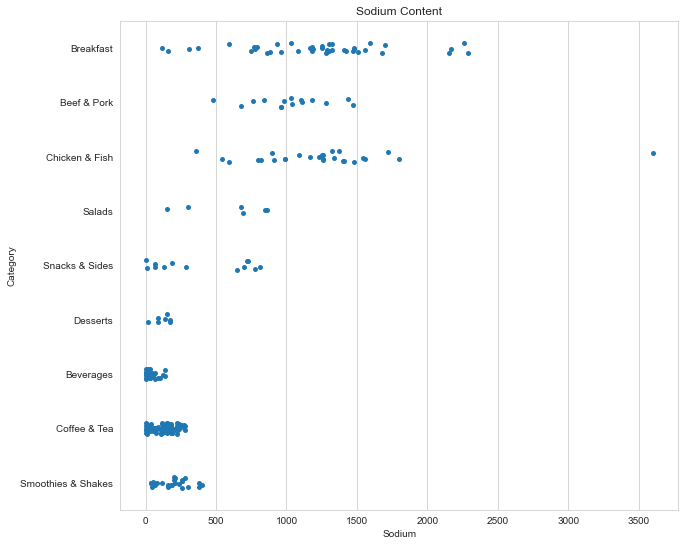

In [18]:
plt.figure(figsize=(10,9))
plot = sns.stripplot(y='Category', x='Sodium', data=menu, jitter=True)
#plt.setp(plot.get_xticklabels(), rotation=45)
plt.title("Sodium Content");

In [19]:
menu['Sodium'].idxmax()

82

In [20]:
menu.at[82, 'Item']

'Chicken McNuggets (40 piece)'

In [21]:
menu.at[82, 'Sodium']

3600

In [22]:
menu.at[82, 'Calories']

1880

In [23]:
menu.at[82, 'Category']

'Chicken & Fish'

### Protein vs Total Fat

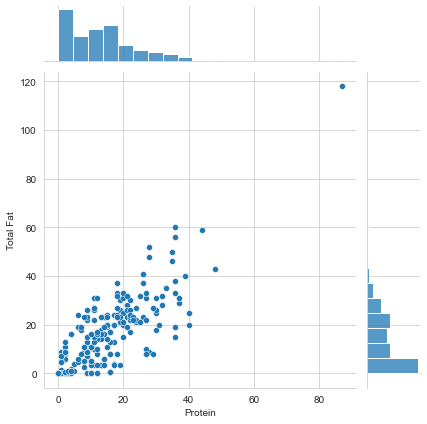

In [24]:
plot = sns.jointplot(y='Total Fat', x='Protein', data=menu);

### Calories vs Protein

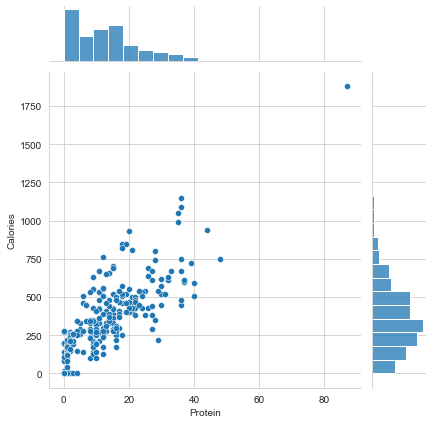

In [25]:
plot = sns.jointplot(x='Protein', y='Calories', data=menu);

In [26]:
menu['Protein'].idxmax()

82

In [27]:
menu.at[82, 'Item']

'Chicken McNuggets (40 piece)'

In [28]:
menu.at[82, 'Protein']

87

In [29]:
menu.at[82, 'Total Fat']

118.0

In [30]:
menu.at[82, 'Calories']

1880

In [31]:
menu.at[82, 'Category']

'Chicken & Fish'

### Calories vs Carbohydrates

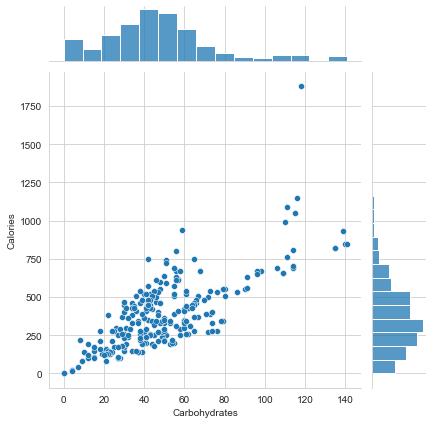

In [32]:
plot = sns.jointplot(x='Carbohydrates', y='Calories', data=menu);

In [33]:
menu['Carbohydrates'].idxmax()

249

In [34]:
menu.at[249, 'Item']

'Chocolate Shake (Large)'

In [35]:
menu.at[249, 'Calories']

850

In [36]:
menu.at[249, 'Category']

'Smoothies & Shakes'

### Calories vs Cholesterol

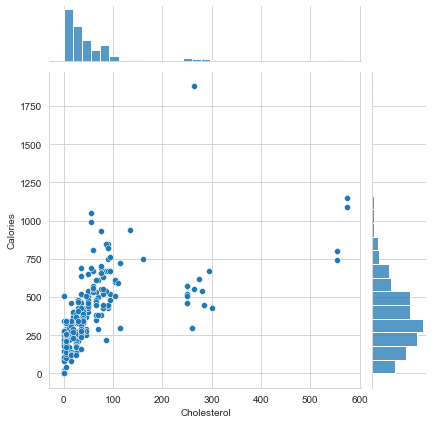

In [37]:
plot = sns.jointplot(x='Cholesterol', y='Calories', data=menu);

In [38]:
menu['Cholesterol'].idxmax()

31

In [39]:
menu.at[31, 'Item']

'Big Breakfast with Hotcakes (Regular Biscuit)'

In [40]:
menu.at[31, 'Cholesterol']

575

In [41]:
menu.at[31, 'Calories']

1090

In [42]:
menu.at[31, 'Category']

'Breakfast'

### Calories vs Total Fat

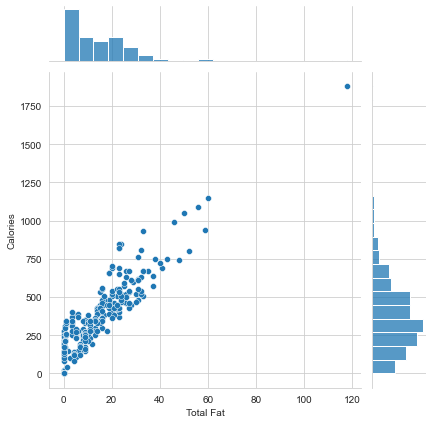

In [43]:
plot = sns.jointplot(x='Total Fat', y='Calories', data=menu);

In [44]:
menu['Total Fat'].idxmax()

82

In [45]:
menu.at[82, 'Item']

'Chicken McNuggets (40 piece)'

### Calories vs Sugars

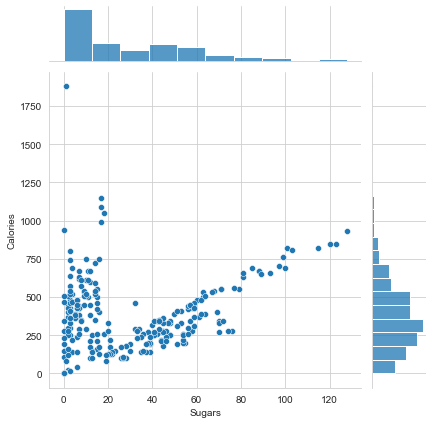

In [46]:
plot = sns.jointplot(x='Sugars', y='Calories', data=menu);

In [47]:
menu['Sugars'].idxmax()

253

In [48]:
menu.at[253, 'Item']

'McFlurry with M&Mâ€™s Candies (Medium)'

In [49]:
menu.at[253, 'Sugars']

128

In [50]:
menu.at[253, 'Calories']

930

In [51]:
menu.at[253, 'Category']

'Smoothies & Shakes'

### Calories vs Dietary Fiber

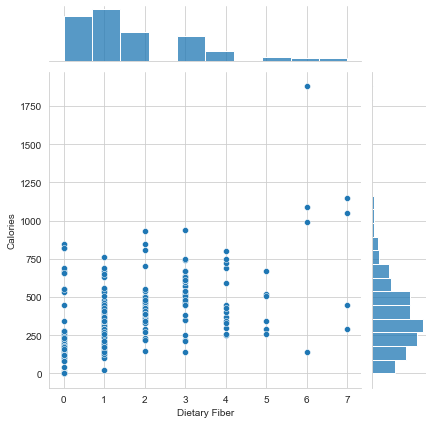

In [52]:
plot = sns.jointplot(x='Dietary Fiber', y='Calories', data=menu);

In [53]:
menu['Dietary Fiber'].idxmax()

32

In [54]:
menu.at[32, 'Item']

'Big Breakfast with Hotcakes (Large Biscuit)'

In [55]:
menu.at[32, 'Dietary Fiber']

7

In [56]:
menu.at[32, 'Calories']

1150

In [57]:
menu.at[32, 'Category']

'Breakfast'

### Calories vs TransFat

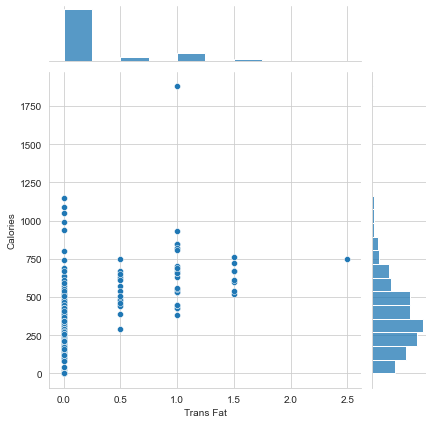

In [58]:
plot = sns.jointplot(x='Trans Fat', y='Calories', data=menu);

In [59]:
menu['Trans Fat'].idxmax()

47

In [60]:
menu.at[47, 'Item']

'Double Quarter Pounder with Cheese'

In [61]:
menu.at[47, 'Trans Fat']

2.5

In [62]:
menu.at[47, 'Calories']

750

In [63]:
menu.at[47, 'Category']

'Beef & Pork'

### Calories vs Vitamin A

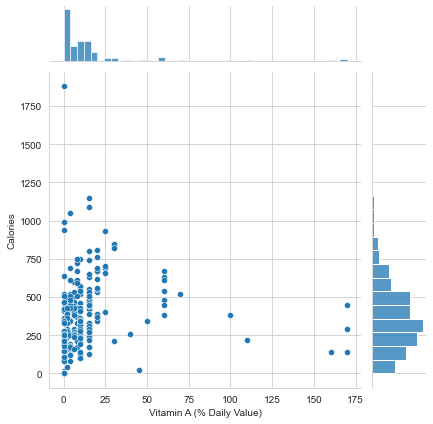

In [64]:
plot = sns.jointplot(x='Vitamin A (% Daily Value)', y='Calories', data=menu);

In [65]:
menu['Vitamin A (% Daily Value)'].idxmax()

84

In [66]:
menu.at[84, 'Item']

'Premium Bacon Ranch Salad (without Chicken)'

In [67]:
menu.at[84, 'Vitamin A (% Daily Value)']

170

In [68]:
menu.at[84, 'Category']

'Salads'

In [69]:
menu.at[84, 'Calories']

140

### Calories vs Calcium

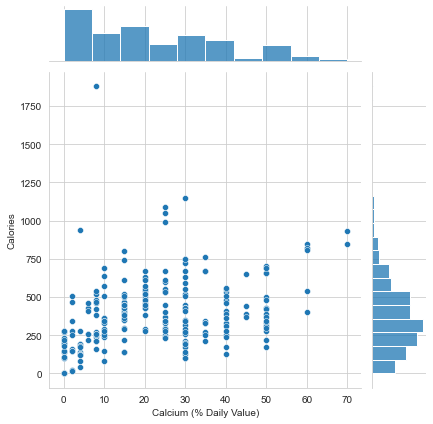

In [70]:
plot = sns.jointplot(x='Calcium (% Daily Value)', y='Calories', data=menu);

In [71]:
menu['Calcium (% Daily Value)'].idxmax()

246

In [72]:
menu.at[246, 'Item']

'Strawberry Shake (Large)'

In [73]:
menu.at[246, 'Calcium (% Daily Value)']

70

In [74]:
menu.at[246, 'Calories']

850

In [75]:
menu.at[246, 'Category']

'Smoothies & Shakes'

### Calories vs Iron

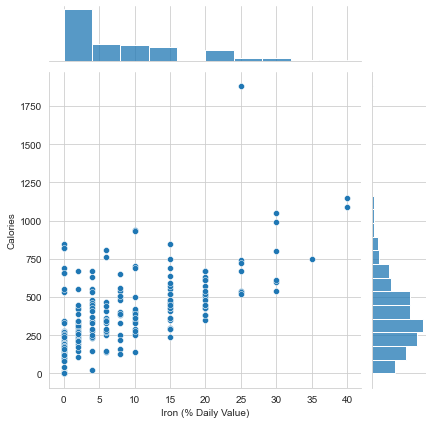

In [76]:
plot = sns.jointplot(x='Iron (% Daily Value)', y='Calories', data=menu);

In [77]:
menu['Iron (% Daily Value)'].idxmax()

31

In [78]:
menu.at[31, 'Item']

'Big Breakfast with Hotcakes (Regular Biscuit)'

In [79]:
menu.at[31, 'Iron (% Daily Value)']

40

In [80]:
menu.at[31, 'Calories']

1090

In [81]:
menu.at[31, 'Category']

'Breakfast'

#### From above plots and functions we have extracted the items with thier respective content values.

### As ranked by Calories using unique Category and Item with High Calories:

1) Chicken & Fish: Chicken McNuggets (40 piece) - 1880kcal

2) Breakfast: Big Breakfast with Hotcakes (Large Biscuit) - 1150kcal

3) Smoothies & Shakes: McFlurry with M & M's Candies (Medium) - 930kcal

4) Beef & Pork: Double Quarter Pounder with Cheese - 750kcal

5) Snacks & Sides: Large French Fries - 510kcal

6) Desserts: Hot Caramel Sundae: 340kcal

7) Beverages: Minute Maid Orange Juice (Large) - 280kcal

### Creating a list with ranked list by Calories: 

In [82]:
lists = ['Chicken & Fish', 'Breakfast', 'Smoothies & Shakes', 'Beef & Pork', 'Snacks & Sides', 'Desserts', 'Beverages']

In [83]:
for list in lists:
    items = menu.query('Category == list').sort_values(by='Calories', ascending=False) # items ascending = False
    items_custom = items.iloc[:,[1,3,5]]
    
    items_t = menu.query('Category == list').sort_values(by='Calories', ascending=True) # items ascending = True
    items_custom = items.iloc[:,[1,3,5]]
    
    print(lists.index(list)+1,'.', list)

1 . Chicken & Fish
2 . Breakfast
3 . Smoothies & Shakes
4 . Beef & Pork
5 . Snacks & Sides
6 . Desserts
7 . Beverages


In [84]:
# # Plotly Express
# import plotly.express as px

# p_express = px.scatter(items_custom, x='Total Fat', y='Calories', color='Item', size='Calories', template='plotly_dark', 
#                       hover_name='Item')
# p_express.show()

In [85]:
# Display Tables ranked by Calories:

table = items_custom.iloc[:,[0,1]].sort_values(by='Calories', ascending=False).style.hide_index()
display(table)

C:\Users\Shashank\AppData\Local\Temp\ipykernel_10744\1814904294.py:3: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  table = items_custom.iloc[:,[0,1]].sort_values(by='Calories', ascending=False).style.hide_index()


Item,Calories
Sprite (Large),280
Minute Maid Orange Juice (Large),280
Coca-Cola Classic (Large),280
Dr Pepper (Large),270
Sprite (Medium),200
Coca-Cola Classic (Medium),200
Dr Pepper (Medium),190
Minute Maid Orange Juice (Medium),190
Minute Maid Orange Juice (Small),150
Dr Pepper (Small),140


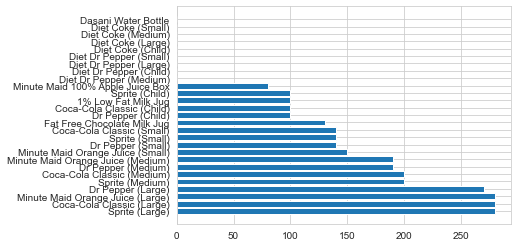

<Figure size 1080x864 with 0 Axes>

In [86]:
# Matplotlib pyplot

fig,ax = plt.subplots()
plt.figure(figsize=(15,12))
x = items_custom.iloc[:,0]
y = items_custom.iloc[:,1]
ax.barh(x,y, tick_label = x);

### Noteworthy points:

1) According to FDA, the recommended adult limit for sodium intake should be less than 2300 mg/day - that's equal to about 1 teaspoon of Table salt.

2) FDA also recommends adults consume 50 grams of Protein per day.

3) USDA recommends 66-97 grams of fat per day in a 2000 and 2500 calorie diet respectively.

4) NHS recommends daily calorie intake of 2000 kcal for women and 2500 kcal for men.

5) "Chicken McNuggets (40 piece)" was found to contain high amounts of Calories (1880 kcal), Sodium (3600 mg), Protein (87 gm), and Total Fat (118 gm).